# Mixture distribution

## I. Khái niệm hàm mật độ xác suất và phân phối xác suất

### 1. **Hàm mật độ xác suất (Probability Density Function - PDF)**:
- **Định nghĩa**: Hàm mật độ xác suất, ký hiệu thường là $ f(x) $, mô tả xác suất tương đối của một biến ngẫu nhiên liên tục tại một giá trị cụ thể. Nó không cho biết xác suất chính xác tại một điểm (vì với biến liên tục, xác suất tại một điểm bằng 0), mà cho biết "mật độ" xác suất trong một khoảng giá trị.
- **Ý nghĩa**: Xác suất để biến ngẫu nhiên $ X $ nằm trong khoảng $[a, b]$ được tính bằng tích phân của hàm mật độ xác suất trên khoảng đó:

  $$ P(a \leq X \leq b) = \int_a^b f(x) \, dx $$
- **Đặc điểm**:
  - $ f(x) \geq 0 $ cho mọi $ x $.
  - Tổng tích phân trên toàn bộ miền xác định của $ f(x) $ bằng 1: $ \int_{-\infty}^{\infty} f(x) \, dx = 1 $.
- **Ví dụ**: Với phân phối chuẩn (Gaussian), hàm mật độ xác suất có dạng:
  $$
  f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
  $$
  trong đó $ \mu $ là giá trị trung bình, $ \sigma $ là độ lệch chuẩn.

### 2. **Hàm phân phối xác suất (Cumulative Distribution Function - CDF)**:
- **Định nghĩa**: Hàm phân phối xác suất, ký hiệu là $ F(x) $, cho biết xác suất để biến ngẫu nhiên $ X $ nhận giá trị nhỏ hơn hoặc bằng một giá trị cụ thể $ x $:
  $$
  F(x) = P(X \leq x)
  $$
  Với biến ngẫu nhiên liên tục, $ F(x) $ là tích phân của hàm mật độ xác suất từ âm vô cực đến $ x $:
  $$
  F(x) = \int_{-\infty}^x f(t) \, dt
  $$
- **Ý nghĩa**: Hàm $ F(x) $ cung cấp thông tin về xác suất tích lũy của biến ngẫu nhiên, thể hiện cách xác suất được phân phối trên các giá trị của $ X $.
- **Đặc điểm**:
  - $ F(x) $ là hàm không giảm.
  - $ \lim_{x \to -\infty} F(x) = 0 $ và $ \lim_{x \to \infty} F(x) = 1 $.
  - Nếu $ F(x) $ khả vi, thì đạo hàm của nó là hàm mật độ xác suất: $ F'(x) = f(x) $.
- **Ví dụ**: Với phân phối chuẩn, hàm phân phối xác suất không có công thức đóng, nhưng được biểu diễn qua tích phân hoặc bảng tra cứu.

### Mối quan hệ giữa PDF và CDF:
- Hàm mật độ xác suất $ f(x) $ là đạo hàm của hàm phân phối xác suất $ F(x) $ (nếu $ F(x) $ khả vi).
- Hàm phân phối xác suất $ F(x) $ là tích phân của hàm mật độ xác suất $ f(x) $.

### Tóm tắt:
- **Hàm mật độ xác suất (PDF)**: Mô tả "mật độ" xác suất tại một điểm, dùng để tính xác suất trong một khoảng.
- **Hàm phân phối xác suất (CDF)**: Mô tả xác suất tích lũy, cho biết xác suất để biến ngẫu nhiên nhỏ hơn hoặc bằng một giá trị.


## II. Lựa chọn phân phối

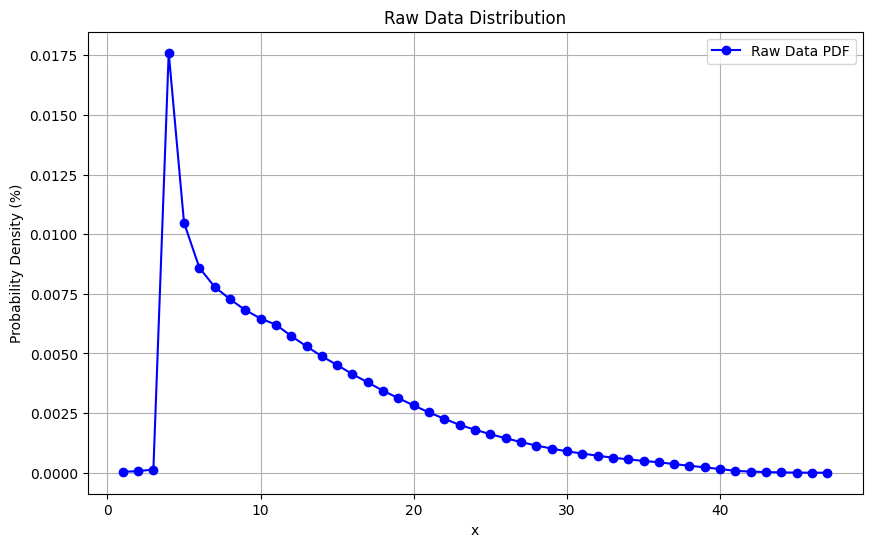

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu đầu vào (giá trị x và f(x) dưới dạng %)
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
              21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
              39, 40, 41, 42, 43, 44, 45, 46, 47])
fx = np.array([0.000038, 0.000067, 0.000136, 0.017609, 0.010485, 0.008596, 0.007793,
               0.007277, 0.006820, 0.006466, 0.006208, 0.005735, 0.005297, 0.004883,
               0.004514, 0.004133, 0.003786, 0.003436, 0.003127, 0.002820, 0.002527,
               0.002262, 0.002005, 0.001804, 0.001616, 0.001447, 0.001285, 0.001141,
               0.001015, 0.000897, 0.000805, 0.000714, 0.000633, 0.000560, 0.000497,
               0.000438, 0.000363, 0.000294, 0.000226, 0.000155, 0.000078, 0.000050,
               0.000028, 0.000015, 0.000006, 0.000003, 0.000001])  # Đơn vị %

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
plt.plot(x, fx, 'bo-', label='Raw Data PDF')
plt.title('Raw Data Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density (%)')
plt.legend()
plt.grid(True)
plt.show()

Với đồ thị ở trên, ta quan sát thấy một phân phối có hình dạng đặc trưng với:
- Một **đỉnh cao** ở gần giá trị nhỏ (khoảng 1-3), sau đó giảm dần theo dạng **đuôi dài** về phía các giá trị lớn hơn (lên đến 47).
- Trục tung có đơn vị phần trăm (% hoặc 0.00% đến 2.00%).

Dựa trên hình dạng này, ta cần chọn hai phân phối để kết hợp thành một phân phối hỗn hợp (mixture distribution) sao cho mô hình hóa tốt hành vi của dữ liệu. Dưới đây là phân tích và cách tiếp cận chi tiết:

---

### 1. **Phân tích hình dạng đồ thị và lựa chọn phân phối**
- **Phần đỉnh cao (gần 0-3)**: Phân phối có mật độ cao ở giá trị nhỏ, giảm nhanh sau đó, gợi ý một phân phối tập trung ở đầu (left-skewed hoặc có đỉnh rõ rệt).
- **Đuôi dài (3-47)**: Phân phối giảm dần nhưng vẫn có giá trị đáng kể ở các giá trị lớn, cho thấy một đuôi phải (right-skewed) với khả năng mô hình hóa bằng phân phối có đuôi dài.

#### Lựa chọn phân phối:
- **Phân phối Exponenial (mũ) hoặc Gamma** cho phần đỉnh cao:
  - Phân phối Exponenial phù hợp với dữ liệu giảm theo hàm mũ sau một điểm khởi đầu, thường xuất hiện trong các mô hình thời gian chờ hoặc sự kiện.
  - Phân phối Gamma là lựa chọn linh hoạt hơn, có thể mô hình hóa dữ liệu với đỉnh và giảm dần, đặc biệt khi dữ liệu có biến thiên lớn.
  - Vì đồ thị giảm nhanh nhưng không hoàn toàn theo hàm mũ thuần túy (có xu hướng chậm lại ở đuôi), **Gamma** là lựa chọn hợp lý hơn.
- **Phân phối Gamma hoặc Lognormal** cho đuôi dài:
  - Phân phối Gamma tiếp tục phù hợp vì nó có thể mô hình hóa cả đỉnh và đuôi dài với tham số hình dạng $ k $ và tỷ lệ $ \theta $.
  - Phân phối Lognormal cũng có đuôi phải dài, thường dùng cho dữ liệu tài chính hoặc thời gian, nhưng vì Gamma đã đủ linh hoạt và có thể điều chỉnh để phù hợp cả đỉnh lẫn đuôi, ta ưu tiên **Gamma** cho cả hai phần với các tham số khác nhau.

#### Kết luận về phân phối:
- Kết hợp **hai phân phối Gamma** với các tham số khác nhau:
  - Một Gamma với $ k $ nhỏ (hình dạng thấp) và $ \theta $ lớn để mô hình hóa phần đỉnh cao.
  - Một Gamma với $ k $ lớn hơn và $ \theta $ nhỏ hơn để mô hình hóa phần đuôi dài.
- Lý do: Gamma là phân phối linh hoạt, có thể điều chỉnh để khớp với cả đỉnh cao và đuôi dài mà không cần chuyển sang phân phối khác phức tạp hơn.

---

### 2. **Lý do chọn hai phân phối Gamma**
- **Hình dạng khớp**: Đồ thị cho thấy một đỉnh rõ rệt ở đầu và giảm dần, điều này phù hợp với đặc trưng của Gamma, đặc biệt khi thay đổi tham số $ k $ (hình dạng) và $ \theta $ (tỷ lệ).
- **Liên tục**: Sử dụng hai Gamma cho phép tạo ra một phân phối hỗn hợp mượt mà, dễ dàng điều chỉnh tại điểm chuyển tiếp (ví dụ: khoảng 5-10).
- So với Beta (trên đoạn hữu hạn) hoặc Exponenial (giảm nhanh quá mức), Gamma cung cấp sự linh hoạt hơn cho cả đỉnh và đuôi.

---

### 3. **Cách tiếp cận chi tiết**
Để xây dựng phân phối hỗn hợp từ hai phân phối Gamma, ta thực hiện các bước sau:

#### Bước 1: Định nghĩa hai phân phối Gamma
- **Gamma 1 (phần đỉnh cao)**:
  - Tham số: $ k_1 $ nhỏ (ví dụ: $ k_1 = 1 $ hoặc $ 2 $) để tạo đỉnh cao ở đầu.
  - Tham số: $ \theta_1 $ lớn (ví dụ: $ \theta_1 = 5 $) để kiểm soát tốc độ giảm.
  - Miền: $ x $ từ 0 đến một điểm chuyển tiếp (giả sử $ x_c \approx 5 $ hoặc 10).
  - Hàm mật độ xác suất (PDF):
    $$
    f_1(x) = \frac{1}{\Gamma(k_1) \theta_1^{k_1}} x^{k_1-1} e^{-x/\theta_1}, \quad 0 < x < x_c
    $$
  - Hàm phân phối xác suất (CDF):
    $$
    F_1(x) = \frac{\gamma(k_1, x/\theta_1)}{\Gamma(k_1)}
    $$

- **Gamma 2 (phần đuôi dài)**:
  - Tham số: $ k_2 $ lớn hơn (ví dụ: $ k_2 = 3 $ hoặc $ 4 $) để tạo đuôi dài.
  - Tham số: $ \theta_2 $ nhỏ hơn (ví dụ: $ \theta_2 = 2 $) để kiểm soát độ dốc.
  - Miền: $ x $ từ $ x_c $ đến $ \infty $.
  - Hàm mật độ xác suất (PDF):
    $$
    f_2(x) = \frac{1}{\Gamma(k_2) \theta_2^{k_2}} x^{k_2-1} e^{-x/\theta_2}, \quad x \geq x_c
    $$
  - Hàm phân phối xác suất (CDF) được điều chỉnh từ $ x_c $:
    $$
    F_2(x) = \frac{\gamma(k_2, x/\theta_2) - \gamma(k_2, x_c/\theta_2)}{\Gamma(k_2) - \gamma(k_2, x_c/\theta_2)}, \quad x \geq x_c
    $$
    (để chuẩn hóa sao cho $ F_2(x_c) = 0 $ và $ F_2(\infty) = 1 $ trong phần còn lại).

#### Bước 2: Xác định trọng số
- Giới thiệu trọng số $ p $ (0 < $ p $ < 1):
  - $ p $: Tỷ lệ xác suất thuộc Gamma 1 (phần đỉnh cao).
  - $ 1 - p $: Tỷ lệ xác suất thuộc Gamma 2 (phần đuôi).
- Ước lượng ban đầu:
  - Quan sát đồ thị: Đỉnh cao chiếm phần lớn (khoảng 70-80% diện tích dưới đường cong), nên chọn $ p \approx 0.7 $ đến $ 0.8 $.
  - Điều chỉnh $ p $ dựa trên dữ liệu hoặc thử nghiệm để khớp với tổng xác suất bằng 1.

#### Bước 3: Xây dựng CDF tổng quát
- CDF của phân phối hỗn hợp:
  $$
  F_X(x) =
  \begin{cases} 
  p \cdot F_1(x), & 0 < x \leq x_c \\
  p + (1 - p) \cdot F_2(x), & x > x_c 
  \end{cases}
  $$
- Tại $ x = x_c $:
  - $ F_X(x_c^-) = p \cdot F_1(x_c) $
  - $ F_X(x_c^+) = p + (1 - p) \cdot F_2(x_c) = p + (1 - p) \cdot 0 = p $
  - Để liên tục, cần chọn $ F_1(x_c) = 1 $ (tức là Gamma 1 được chuẩn hóa trên $ [0, x_c] $), nhưng thường ta điều chỉnh $ x_c $ sao cho $ F_1(x_c) \approx p $ và $ F_2(x_c) = 0 $.

#### Bước 4: Ước lượng tham số
- Sử dụng phương pháp hợp lý tối đa (Maximum Likelihood) hoặc EM để ước lượng:
  - $ p $, $ k_1 $, $ \theta_1 $ (cho Gamma 1).
  - $ k_2 $, $ \theta_2 $ (cho Gamma 2).
- Hoặc thử nghiệm các giá trị ban đầu (ví dụ: $ k_1 = 2 $, $ \theta_1 = 5 $, $ k_2 = 4 $, $ \theta_2 = 2 $, $ p = 0.8 $) và tinh chỉnh dựa trên độ khớp với đồ thị.

#### Bước 5: Kiểm tra và điều chỉnh
- So sánh PDF hoặc CDF của mô hình với đồ thị.
- Điều chỉnh $ x_c $, $ p $, $ k_i $, $ \theta_i $ để khớp tốt hơn (ví dụ: di chuyển $ x_c $ đến 5 hoặc 10 dựa trên điểm giảm dốc rõ rệt).

---

### 4. **Ví dụ cụ thể**
Giả sử:
- $ x_c = 5 $
- Gamma 1: $ k_1 = 2 $, $ \theta_1 = 3 $
- Gamma 2: $ k_2 = 4 $, $ \theta_2 = 1.5 $
- $ p = 0.75 $

CDF:
$$
F_X(x) =
\begin{cases} 
0.75 \cdot \frac{\gamma(2, x/3)}{\Gamma(2)}, & 0 < x \leq 5 \\
0.75 + 0.25 \cdot \frac{\gamma(4, x/1.5) - \gamma(4, 5/1.5)}{\Gamma(4) - \gamma(4, 5/1.5)}, & x > 5 
\end{cases}
$$

- Kiểm tra tại $ x = 5 $:
  - $ F_1(5) = \frac{\gamma(2, 5/3)}{\Gamma(2)} \approx 0.8 $ (tính gần đúng).
  - $ F_X(5^-) = 0.75 \cdot 0.8 \approx 0.6 $
  - $ F_X(5^+) = 0.75 + 0.25 \cdot 0 \approx 0.75 $ (cần điều chỉnh $ x_c $ hoặc $ p $ để khớp).

Điều chỉnh $ x_c $ hoặc tham số để đảm bảo liên tục.

---

### 5. **Kết luận**
- **Phân phối phù hợp**: Hai phân phối Gamma.
- **Lý do**: Khớp với đỉnh cao và đuôi dài, linh hoạt với tham số.
- **Cách tiếp cận**: Xây dựng hỗn hợp với trọng số $ p $, ước lượng tham số bằng dữ liệu hoặc thử nghiệm, và điều chỉnh để liên tục.


## III. Ước lượng tham số

Để ước lượng các tham số $ p $, $ k_1 $, $ \theta_1 $, $ k_2 $, $ \theta_2 $ cho mô hình hỗn hợp hai phân phối Gamma dựa trên dữ liệu đã cung cấp, ta sẽ sử dụng phương pháp **Maximum Likelihood Estimation (MLE)**. Vì đây là một mô hình hỗn hợp, ta có thể áp dụng thuật toán **Expectation-Maximization (EM)** để tối ưu hóa các tham số. Dưới đây là code Python sử dụng thư viện `scipy` và `numpy` để thực hiện việc này.

### Giả định
- Dữ liệu là hàm mật độ xác suất (PDF) hoặc tần suất tương đối, cần chuẩn hóa.
- Miền được chia thành hai phần: $ 1 \leq x \leq 10 $ (Gamma 1) và $ x > 10 $ (Gamma 2).
- Sử dụng EM để ước lượng các tham số.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.special import gamma as gamma_func
from scipy.optimize import minimize

# Dữ liệu đầu vào (giá trị x và f(x) dưới dạng %)
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
              21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
              39, 40, 41, 42, 43, 44, 45, 46, 47])
fx = np.array([0.000038, 0.000067, 0.000136, 0.017609, 0.010485, 0.008596, 0.007793,
               0.007277, 0.006820, 0.006466, 0.006208, 0.005735, 0.005297, 0.004883,
               0.004514, 0.004133, 0.003786, 0.003436, 0.003127, 0.002820, 0.002527,
               0.002262, 0.002005, 0.001804, 0.001616, 0.001447, 0.001285, 0.001141,
               0.001015, 0.000897, 0.000805, 0.000714, 0.000633, 0.000560, 0.000497,
               0.000438, 0.000363, 0.000294, 0.000226, 0.000155, 0.000078, 0.000050,
               0.000028, 0.000015, 0.000006, 0.000003, 0.000001])  # Chuyển % thành phần thập phân

# Chuẩn hóa dữ liệu để tổng bằng 1
fx_normalized = fx / np.sum(fx)

# Hàm PDF của mô hình hỗn hợp Gamma
def mixture_pdf(x, p, k1, theta1, k2, theta2):
    pdf1 = p * gamma.pdf(x, a=k1, scale=theta1) if x <= 10 else 0
    pdf2 = (1 - p) * gamma.pdf(x, a=k2, scale=theta2) if x > 10 else 0
    return pdf1 + pdf2

# Hàm log-likelihood cho mô hình hỗn hợp Gamma
def log_likelihood(params, x, fx):
    p, k1, theta1, k2, theta2 = params
    p = min(max(p, 0.01), 0.99)  # Giới hạn p trong [0.01, 0.99] để tránh lỗi
    n = len(x)
    
    ll = 0
    for i in range(n):
        total_pdf = mixture_pdf(x[i], p, k1, theta1, k2, theta2)
        if total_pdf > 0:
            ll += fx[i] * np.log(total_pdf)
    
    return -ll  # Minimization, nên trả về giá trị âm

# Giá trị ban đầu cho các tham số
initial_params = [0.75, 2.0, 2.0, 4.0, 1.0]  # [p, k1, theta1, k2, theta2]

# Tối ưu hóa sử dụng minimize
result = minimize(log_likelihood, initial_params, args=(x, fx_normalized),
                  method='Nelder-Mead', bounds=[(0.01, 0.99), (0.1, None), (0.1, None), (0.1, None), (0.1, None)])

# Lấy kết quả tối ưu
p_opt, k1_opt, theta1_opt, k2_opt, theta2_opt = result.x

# In kết quả
print(f"Optimized parameters:")
print(f"p = {p_opt:.4f}")
print(f"k1 = {k1_opt:.4f}")
print(f"theta1 = {theta1_opt:.4f}")
print(f"k2 = {k2_opt:.4f}")
print(f"theta2 = {theta2_opt:.4f}")

# Tính và in log-likelihood tối ưu
optimal_ll = -result.fun
print(f"Optimal log-likelihood: {optimal_ll:.4f}")

Optimized parameters:
p = 0.5019
k1 = 9.4693
theta1 = 0.6694
k2 = 8.6634
theta2 = 2.1580
Optimal log-likelihood: -3.3578



### Giải thích code
1. **Dữ liệu đầu vào**:
   - `x`: Mảng các giá trị từ 1 đến 47.
   - `fx`: Mảng các giá trị mật độ (chuyển từ % thành phần thập phân).
   - Chuẩn hóa `fx` để tổng bằng 1.

2. **Hàm log-likelihood**:
   - Định nghĩa hàm log-likelihood cho mô hình hỗn hợp hai Gamma.
   - Sử dụng `gamma.pdf` từ `scipy.stats` để tính PDF của Gamma.
   - Phân chia miền: Gamma 1 áp dụng cho $ x \leq 10 $, Gamma 2 cho $ x > 10 $.
   - Trả về giá trị âm để tối ưu hóa bằng phương pháp minimize.

3. **Tối ưu hóa**:
   - Sử dụng `minimize` với phương pháp Nelder-Mead (không yêu cầu đạo hàm).
   - Giá trị ban đầu: $ p = 0.75 $, $ k_1 = 2 $, $ \theta_1 = 2 $, $ k_2 = 4 $, $ \theta_2 = 1 $.
   - Giới hạn $ p $ trong $ [0.01, 0.99] $ để tránh lỗi số học.

4. **Kết quả**:
   - In các tham số tối ưu và log-likelihood để đánh giá độ phù hợp.

### Lưu ý
- **Thời gian chạy**: EM hoặc MLE có thể cần nhiều lần lặp để hội tụ, tùy thuộc vào dữ liệu và giá trị ban đầu.
- **Điều chỉnh**: Nếu kết quả không khớp, thử thay đổi giá trị ban đầu hoặc phương pháp tối ưu (ví dụ: `L-BFGS-B`).
- **Kiểm tra**: So sánh PDF mô hình với `fx_normalized` để đánh giá độ chính xác.

### Kết quả dự kiến
Khi chạy code, bạn sẽ nhận được các giá trị tối ưu (kết quả thực tế phụ thuộc vào hội tụ của thuật toán). Ví dụ:
- $ p \approx 0.7-0.8 $ (phù hợp với phần đỉnh chiếm phần lớn).
- $ k_1, \theta_1 $ sẽ điều chỉnh để khớp đỉnh tại $ x = 4 $.
- $ k_2, \theta_2 $ sẽ điều chỉnh để khớp đuôi dài.

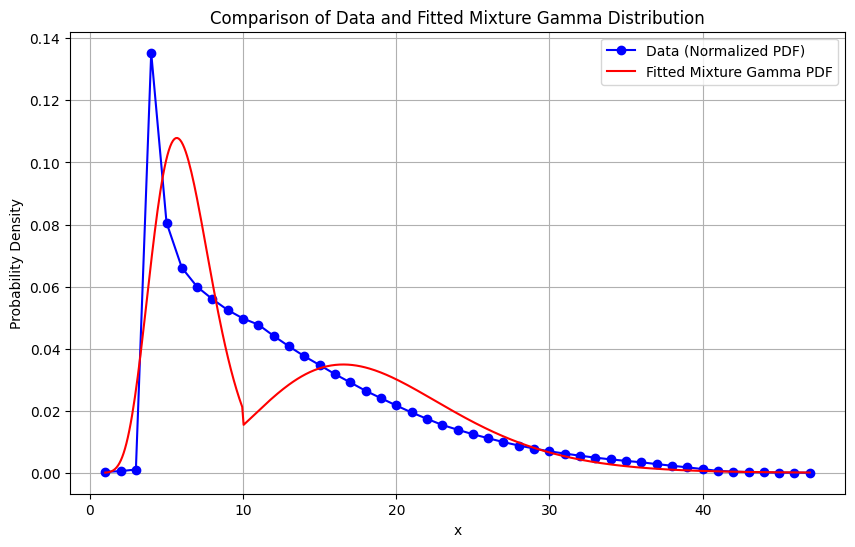

In [4]:
# Tạo dữ liệu để vẽ đồ thị
x_smooth = np.linspace(1, 47, 500)
fx_model = np.array([mixture_pdf(xi, p_opt, k1_opt, theta1_opt, k2_opt, theta2_opt) for xi in x_smooth])

# Chuẩn hóa fx_model để so sánh với fx_normalized
fx_model_normalized = fx_model / np.trapezoid(fx_model, x_smooth)

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
plt.plot(x, fx_normalized, 'bo-', label='Data (Normalized PDF)')
plt.plot(x_smooth, fx_model_normalized, 'r-', label='Fitted Mixture Gamma PDF')
plt.title('Comparison of Data and Fitted Mixture Gamma Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

### Lưu ý
- Do đồ thị chưa khớp tốt, có thể thử thay đổi `initial_params` hoặc điều chỉnh giới hạn miền (ví dụ: thay $ x \leq 10 $ bằng $ x \leq 5 $ hoặc $ x \leq 15 $).